## Lending Club Case Study


### Business Understanding
Consumer finance company lends various types of loans to urban customers. As company receives various types of loan the company has to make a decision for loan approval based on the applicant’s profile.

Based on dataset company can take two types of decisions :
1. Loan accepted
2. Loan rejected

### Objective 
Identify the risky loan applicants at the time of loan application so that such loans can be reduced. 
Identification of such applicants using EDA is the aim of this case study.

#### Implementation Steps
1. Data understanding
2. Data cleaning (cleaning missing values , removing redundant columns etc )
3. Data Analysis
4. Recommendation



### Data Understanding
1. Read the data to Python Dataframe
2. Check the datatype of various columns
3. Correct the datatype of the column if required
    - Check columns where you may require to extract numerical data
4. Identify the target column

In [130]:
# Importing packages

import pandas as pd
import numpy as np
import chardet

import matplotlib.pyplot as plt
import seaborn as sns

# Get Encoding Type of loan.csv files
with open("loan.csv" , 'rb') as rawdata:
   encodingType = chardet.detect(rawdata.read(2000))
print(encodingType)


# Setting Display format to float
pd.options.display.float_format = '{:.2f}'.format

# Pandas Data frame settings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [131]:
loan = pd.read_csv("loan.csv" , sep=",")
loan.info()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [132]:
# Read the data to Python Dataframe
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,nan,nan,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,nan,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,

In [133]:
# Check the datatype of various columns
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit'], dtype='object', length=111)

##### Identify the target column

Some important columns in the dataset are: loan_amount, term ,intrest rate ,grade ,sub grade , annual income, purpose of the loan etc.

Target Variable which we want to compare accross the independent variables is loan_status. Strategy is to compare the average default rate across various independent varaialbes and identify the ones that affect default rate the most.

### Data Cleaning
1. Check the percentage of missing values
2. Remove all those with very high missing percentage.
3. For columns with less missing percentage: perform imputation    
4. Drop rows where missing percentage is quite high

In [134]:
# Check the percentage of missing values

percent_missing = loan.isnull().sum() * 100 / len(loan)
missing_value_df = pd.DataFrame({'column_name': loan.columns,
                                 'percent_missing': percent_missing.round(2)})
missing_value_df.sort_values('percent_missing', inplace=True)


In [135]:
# Columns with all Null Value
(missing_value_df['percent_missing'] == 100.00).sum()

54

In [136]:
# List the columns with all Null Values
missing_values_columns = missing_value_df[(missing_value_df['percent_missing'] == 100.00)].column_name.tolist()

In [137]:
# Dropping columns having all missing values
null_columns_dropped_data = loan.drop(missing_values_columns, axis=1)

In [138]:
# Remove unnecessy columns for analysis or remove columns having all same value. 
drop_columns = ['desc', 'member_id', 'url', 'next_pymnt_d','mths_since_last_record', 'mths_since_last_delinq' , 'delinq_amnt', 'acc_now_delinq', 'application_type','policy_code', 'pymnt_plan', 'initial_list_status', 'chargeoff_within_12_mths','tax_liens', 'collections_12_mths_ex_med']

null_columns_dropped_data = null_columns_dropped_data.drop(drop_columns, axis=1)

In [139]:
# Deleting string columns having most of as unique values
null_columns_dropped_data = null_columns_dropped_data.drop(['emp_title'], axis=1)

In [140]:
# Check percentage of missing data
((null_columns_dropped_data.isnull().sum() * 100 / len(null_columns_dropped_data)).sort_values(ascending=False)).head(11)

emp_length             2.71
pub_rec_bankruptcies   1.75
last_pymnt_d           0.18
revol_util             0.13
title                  0.03
last_credit_pull_d     0.01
loan_amnt              0.00
purpose                0.00
loan_status            0.00
issue_d                0.00
verification_status    0.00
dtype: float64

In [141]:
null_columns_dropped_data.shape

(39717, 41)

In [142]:
null_columns_dropped_data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00
1,1077430,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00
2,1077175,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00
3,1076863,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00
4,1075358,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.00,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.00


### Data Analysis
1. Identify categorical columns. 
2. Creating derived columns.
3. Updated column datatype.
4. Count of Categorical and numeric columns.

In [143]:
## 1. Identify categorical columns.
#Count of No of Unique values in the columns

data = []
for row in null_columns_dropped_data.columns.tolist():
    data.append({'column':row , 'count': len(null_columns_dropped_data[row].unique())})

In [144]:
unique = pd.DataFrame(data).sort_values('count')

In [145]:
unique.head(20)

,column,count
4,term,2
14,loan_status,3
12,verification_status,3
40,pub_rec_bankruptcies,4
24,pub_rec,5
10,home_ownership,5
7,grade,7
22,inq_last_6mths,9
20,delinq_2yrs,11
9,emp_length,12


In [146]:
## 2. Creating Derived Columns 

null_columns_dropped_data['term_months'] = null_columns_dropped_data['term'].str.rstrip('months')
del null_columns_dropped_data['term']



In [147]:
null_columns_dropped_data['int_rate_percentage'] = null_columns_dropped_data['int_rate'].str.rstrip('%')
del null_columns_dropped_data['int_rate']


In [148]:
null_columns_dropped_data['emp_length_years'] = null_columns_dropped_data['emp_length'].str.rstrip('years ')
null_columns_dropped_data['emp_length_years'].replace({'10+': '10'}, inplace=True)
null_columns_dropped_data['emp_length_years'][null_columns_dropped_data['emp_length_years'] == '< 1'] = '0.5'
del null_columns_dropped_data['emp_length']

<ipython-input-148-c4582a02a9ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_columns_dropped_data['emp_length_years'][null_columns_dropped_data['emp_length_years'] == '< 1'] = '0.5'


In [149]:
null_columns_dropped_data['revol_util_percentage'] = null_columns_dropped_data['revol_util'].str.rstrip('%')
del null_columns_dropped_data['revol_util']

In [151]:
null_columns_dropped_data['issue_d_month'], null_columns_dropped_data['issue_d_year'] = null_columns_dropped_data[
    'issue_d'].str.split('-').str

null_columns_dropped_data['last_credit_pull_d_month'], null_columns_dropped_data['last_credit_pull_d_year'] = null_columns_dropped_data[
    'last_credit_pull_d'].str.split('-').str

null_columns_dropped_data['last_pymnt_d_month'], null_columns_dropped_data['last_pymnt_d_year'] = null_columns_dropped_data[
    'last_pymnt_d'].str.split('-').str

null_columns_dropped_data['earliest_cr_line_month'], null_columns_dropped_data['earliest_cr_line_year'] = null_columns_dropped_data[
    'earliest_cr_line'].str.split('-').str

<ipython-input-151-02b0e5acf8c0>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  null_columns_dropped_data['issue_d_month'], null_columns_dropped_data['issue_d_year'] = null_columns_dropped_data[
<ipython-input-151-02b0e5acf8c0>:4: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  null_columns_dropped_data['last_credit_pull_d_month'], null_columns_dropped_data['last_credit_pull_d_year'] = null_columns_dropped_data[
<ipython-input-151-02b0e5acf8c0>:7: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  null_columns_dropped_data['last_pymnt_d_month'], null_columns_dropped_data['last_pymnt_d_year'] = null_columns_dropped_data[
<ipython-input-151-02b0e5acf8c0>:10: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  null_columns_dropped_data['earliest_cr_line_month'], null_columns_dropped_data['earliest_cr_line_year'] = null_col

In [152]:
null_columns_dropped_data['issue_d_year'] = '20' + null_columns_dropped_data['issue_d_year']

In [153]:
null_columns_dropped_data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,term_months,int_rate_percentage,emp_length_years,revol_util_percentage,issue_d_month,issue_d_year,last_credit_pull_d_month,last_credit_pull_d_year,last_pymnt_d_month,last_pymnt_d_year,earliest_cr_line_month,earliest_cr_line_year
0,1077501,5000,5000,4975.00,162.87,B,B2,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00,36,10.65,10,83.70,Dec,2011,May,16,Jan,15,Jan,85
1,1077430,2500,2500,2500.00,59.83,C,C4,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00,60,15.27,0.5,9.40,Dec,2011,Sep,13,Apr,13,Apr,99
2,1077175,2400,2400,2400.00,84.33,C,C5,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,10,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00,36,15.96,10,98.50,Dec,2011,May,16,Jun,14,Nov,01
3,1076863,10000,10000,10000.00,339.31,C,C1,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00,36,13.49,10,21,Dec,2011,Apr,16,Jan,15,Feb,96
4,1075358,3000,3000,3000.00,67.79,B,B5,RENT,80000.00,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.00,60,12.69,1,53.90,Dec,2011,May,16,May,16,Jan,96


In [154]:
## 3. Updated column datatype.

columns = ['loan_amnt', 'funded_amnt','funded_amnt_inv', 'installment', 'annual_inc', 'emp_length_years', 'dti', 
          'revol_bal', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
          'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'int_rate_percentage', 'emp_length_years',
          'revol_util_percentage']
null_columns_dropped_data[columns] = null_columns_dropped_data[columns].astype(np.float)



In [155]:
# Creating a profit and loss column
null_columns_dropped_data['PnL']=(null_columns_dropped_data['total_pymnt']-null_columns_dropped_data['funded_amnt'])*100/null_columns_dropped_data['funded_amnt']

In [156]:
null_columns_dropped_data['loan_inc_ratio'] = null_columns_dropped_data.funded_amnt*100/null_columns_dropped_data.annual_inc

In [157]:
columns = ['total_acc', 'term_months', 'issue_d_year']
null_columns_dropped_data[columns] = null_columns_dropped_data[columns].astype(np.int)

In [158]:
columns = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 
           'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies']
null_columns_dropped_data[columns] = null_columns_dropped_data[columns].apply(lambda x: x.astype('category'))

In [159]:
null_columns_dropped_data['annual_inc_lakhs'] = null_columns_dropped_data['annual_inc'] / 1000
null_columns_dropped_data['annual_inc_lakhs'].describe()

count   39717.00
mean       68.97
std        63.79
min         4.00
25%        40.40
50%        59.00
75%        82.30
max      6000.00
Name: annual_inc_lakhs, dtype: float64

In [160]:
null_columns_dropped_data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,term_months,int_rate_percentage,emp_length_years,revol_util_percentage,issue_d_month,issue_d_year,last_credit_pull_d_month,last_credit_pull_d_year,last_pymnt_d_month,last_pymnt_d_year,earliest_cr_line_month,earliest_cr_line_year,PnL,loan_inc_ratio,annual_inc_lakhs
0,1077501,5000.00,5000.00,4975.00,162.87,B,B2,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648.00,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00,36,10.65,10.00,83.70,Dec,2011,May,16,Jan,15,Jan,85,17.26,20.83,24.00
1,1077430,2500.00,2500.00,2500.00,59.83,C,C4,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687.00,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00,60,15.27,0.50,9.40,Dec,2011,Sep,13,Apr,13,Apr,99,-59.65,8.33,30.00
2,1077175,2400.00,2400.00,2400.00,84.33,C,C5,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956.00,10,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00,36,15.96,10.00,98.50,Dec,2011,May,16,Jun,14,Nov,01,25.24,19.59,12.25
3,1076863,10000.00,10000.00,10000.00,339.31,C,C1,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598.00,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00,36,13.49,10.00,21.00,Dec,2011,Apr,16,Jan,15,Feb,96,22.32,20.33,49.20
4,1075358,3000.00,3000.00,3000.00,67.79,B,B5,RENT,80000.00,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783.00,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.00,60,12.69,1.00,53.90,Dec,2011,May,16,May,16,Jan,96,17.11,3.75,80.00


In [161]:
## 4. Count of Categorical and Numeric columns

numeric_data = null_columns_dropped_data.select_dtypes(include = [np.number])

categorical_data = null_columns_dropped_data.select_dtypes(exclude = [np.number, np.object])

string_data = null_columns_dropped_data.select_dtypes(include = [np.object])

print('There are {0} numerical , {1} categorical and {2} string features in the training data'.\
     format(numeric_data.shape[1], categorical_data.shape[1], string_data.shape[1]))

There are 27 numerical , 12 categorical and 13 string features in the training data


In [162]:
## Removing current loan status as it's not needed in the analysis
null_columns_dropped_data = null_columns_dropped_data[null_columns_dropped_data.loan_status !='Current']
null_columns_dropped_data = null_columns_dropped_data.loc[:,null_columns_dropped_data.nunique()!=1]

In [163]:
## Final dataset for Exploratory Data Analytics
df = null_columns_dropped_data

In [164]:
df["loan_status"].value_counts() 

Fully Paid     32950
Charged Off     5627
Current            0
Name: loan_status, dtype: int64

### Recommendation

#### Univariate Analysis

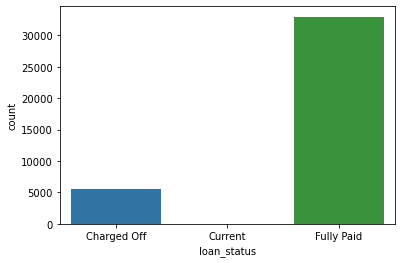

In [42]:
# loan status analysis

sns.countplot(x= null_columns_dropped_data["loan_status"])
plt.show()

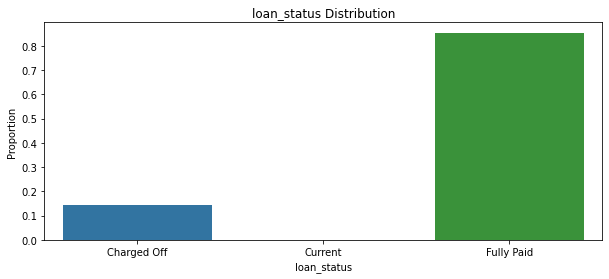

In [45]:
plt.figure(figsize=(10,4))
prob_df = null_columns_dropped_data['loan_status'].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y='loan_status', data=prob_df)
plt.xlabel('loan_status')
plt.ylabel('Proportion')
plt.title('loan_status'+' Distribution')
plt.show()

#### Inference:

1. Most of the loans are Fully Paid.
2. About 14% of loan are having status as defaulters.
3. 85% of borrowers has paid the loan fully.


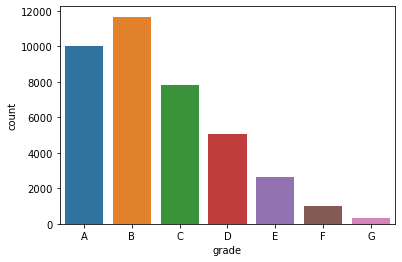

In [46]:
# Loan Grade Analysis

sns.countplot(x='grade', data=df)
plt.show()

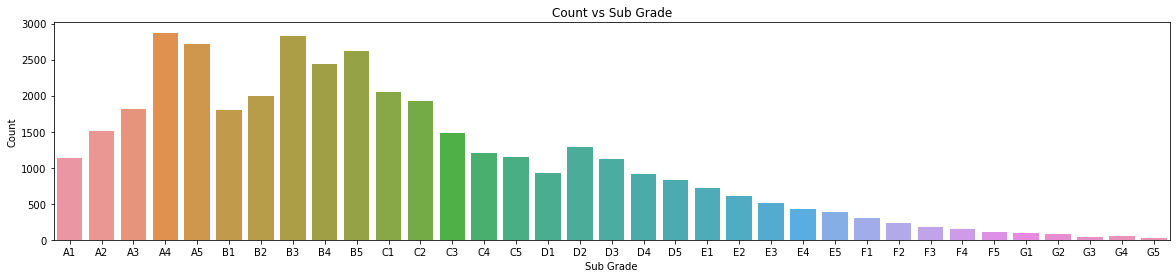

In [49]:
plt.figure(figsize=(20,4))
sns.countplot(x = 'sub_grade', data=df)
plt.title('Count vs Sub Grade')
plt.xlabel('Sub Grade')
plt.ylabel('Count')
plt.show()

<AxesSubplot:title={'center':'Grade vs funded amount'}, xlabel='grade', ylabel='funded_amnt'>

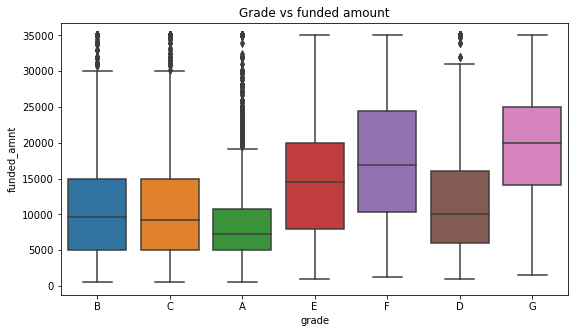

In [53]:
plt.figure(figsize=(20,5))
plt.subplot(122)
plt.title('Grade vs funded amount')
sns.boxplot(x='grade', y='funded_amnt', order = grade_ord, data=df)

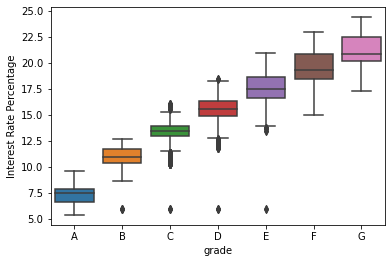

In [54]:
sns.boxplot(y='int_rate_percentage', x='grade', data=df)
plt.ylabel('Interest Rate Percentage')
plt.show()

#### Inference: 

1. Most of the loans have grade of A and B. Therefore stating most of the loans are high graded loans.
2. High Quality loans have low interest rate.
3. Which depicts, higher interest rate have higher tendency to default the loan.
4. The Lower grades(E,F,G) have higher chances of defaulting the loan than Higher ones(A,B)

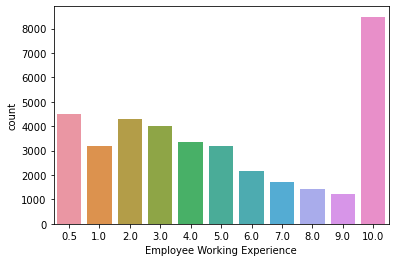

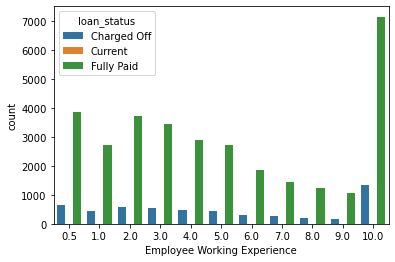

In [55]:
# Work Experience Analysis


sns.countplot(x='emp_length_years', data=df)
plt.xlabel('Employee Working Experience')
plt.show()

sns.countplot(x='emp_length_years', hue='loan_status', data=df)
plt.xlabel('Employee Working Experience')
plt.show()

#### Inference :
1. Majority of employees applying for the loan have more than 10 years of experience
2. Tendency of person to default the loan with 10 years of experience is also high. So company need to be careful
when granting loan.


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


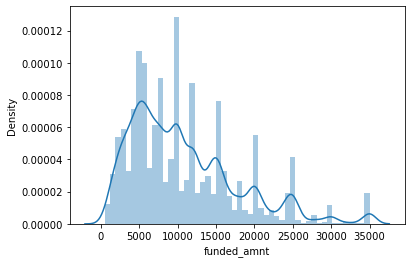

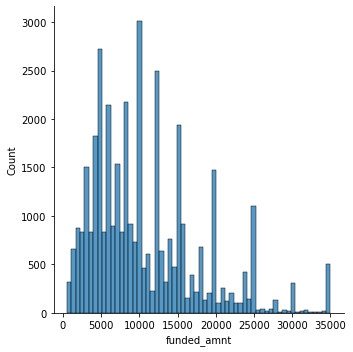

In [182]:
# Loan Amount Analysis

sns.distplot(df['funded_amnt'])
plt.show()

sns.displot(df['funded_amnt'])
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


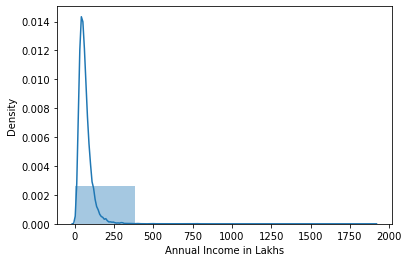

In [179]:
sns.distplot(df[df['annual_inc_lakhs'] < 2000]['annual_inc_lakhs'], bins=5)
plt.xlabel('Annual Income in Lakhs')
plt.show()


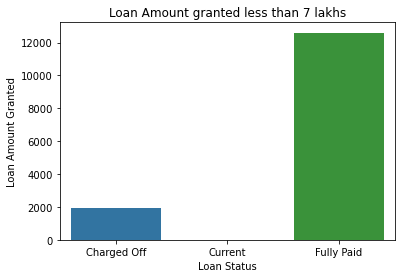

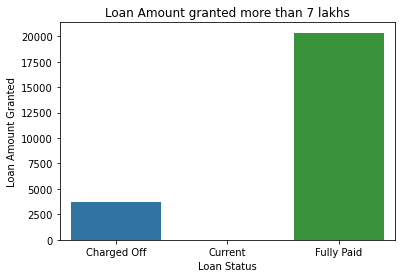

In [171]:
df_agg = df[df['funded_amnt'] <= 7000].groupby(['loan_status'])['funded_amnt'].count().reset_index()

sns.barplot(x='loan_status', y='funded_amnt', data=df_agg)
plt.title('Loan Amount granted less than 7 lakhs')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()

df_agg = df[df['funded_amnt'] > 7000].groupby(['loan_status'])['funded_amnt'].count().reset_index()

sns.barplot(x='loan_status', y='funded_amnt', data=df_agg)
plt.title('Loan Amount granted more than 7 lakhs')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()



#### Inference : 

1. Majority of loan applicants have income less than 5 lakhs
2. Probability of people with loan amount greater than 7 lakhs tends to default is more than the people with less than 7 lakh.
3. Funded amount is left skewed. Most of the loan amount given is below 7 lakhs.

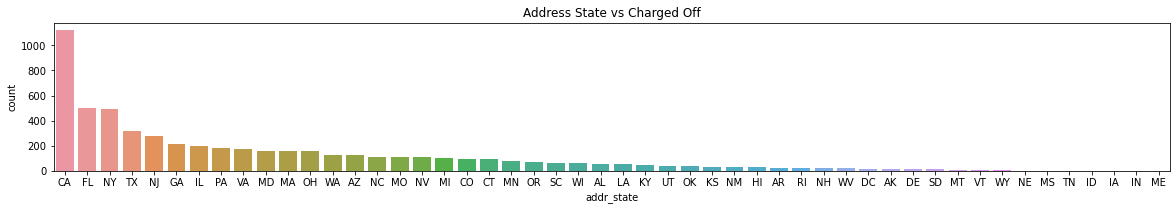

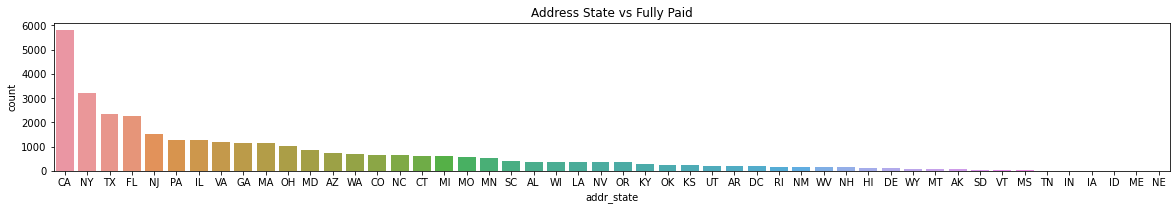

In [59]:
# Loan Defalters by State Analysis

charged_off_df = df[df.loan_status.values == 'Charged Off']
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.countplot(x='addr_state', data=charged_off_df, order=charged_off_df.addr_state.value_counts().index)
plt.title('Address State vs Charged Off')

fp_df = df[df.loan_status.values == 'Fully Paid']
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.countplot(x='addr_state', data=fp_df, order=fp_df.addr_state.value_counts().index)
plt.title('Address State vs Fully Paid')
plt.show()


#### Inference :

The loans which are given for CA, FL and TX state borrower’s are defaulted more than
other states.

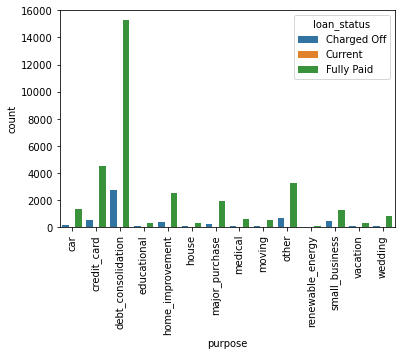

In [122]:
# Purpose for applying Loan Analysis

sns.countplot(x='purpose', hue="loan_status", data=df)
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Purpose vs Loan status (Charged Off)')

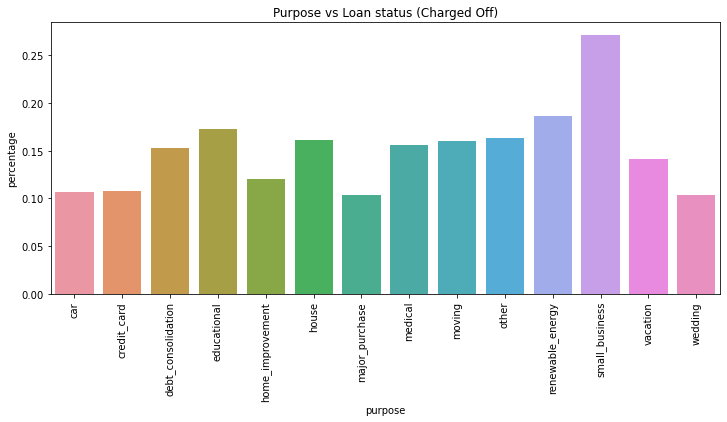

In [123]:
purpose_df = df.groupby(['purpose', 'loan_status'], as_index=False)['id'].count()
purpose_df['percentage'] = purpose_df.groupby('purpose').transform(lambda x: x/x.sum())
purpose_df = purpose_df[purpose_df.loan_status.values == 'Charged Off']
plt.figure(figsize=(12,5))
sns.barplot(x='purpose', y='percentage', data=purpose_df)
plt.xticks(rotation=90)
plt.title('Purpose vs Loan status (Charged Off)')




#### Inference 

1. Most of the loans are granted were for debt consolidation.
2. Borrower’s who took loans for small business purpose have defaulted more.


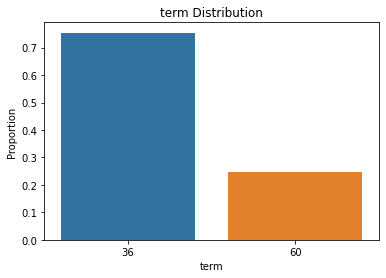

In [167]:
# Loan Status vs Loan Tenure Analysis


prob_df = df['term_months'].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y='term_months', data=prob_df)
plt.xlabel('term')
plt.ylabel('Proportion')
plt.title('term Distribution')
plt.show()

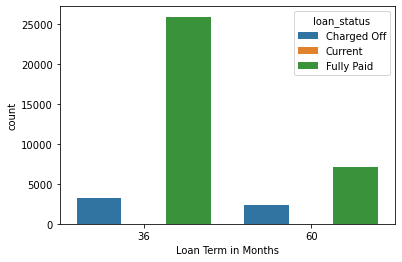

In [168]:
sns.countplot( x="term_months", hue='loan_status', data=df)
plt.xlabel('Loan Term in Months')
plt.show()

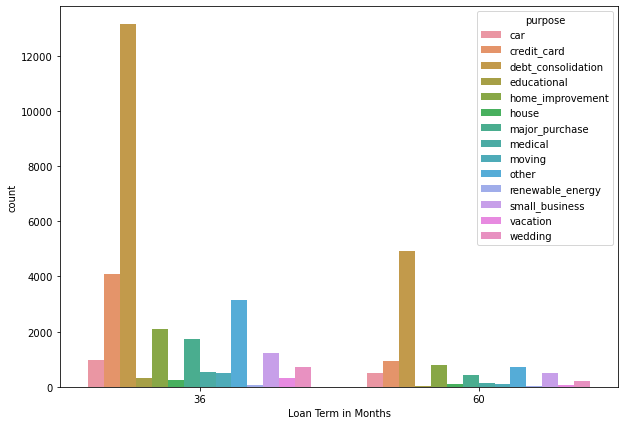

In [169]:
plt.figure(figsize=(10,7))
sns.countplot( x="term_months", hue='purpose', data=df)
plt.xlabel('Loan Term in Months')
plt.show()

#### Inference :
1. Most of the loans granted were of 36 months. 
2. Loans granted for 36 months have slightly high tendency to default. 
3. Additionally, Debt Consolidation is the most common purpose and loans are granted for 36 months and 60 months.

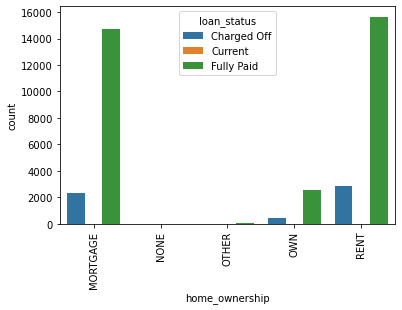

In [170]:
# Loan Status by Home Ownership

sns.countplot(x='home_ownership',hue='loan_status', data=df)
plt.xticks(rotation=90)
plt.show()

#### Inference :
Applicants having there home rented or on mortgage have almost equal tendency to default the loan.